## **Nigeria Crime Trends 1997 - 2024**

In this project, I will be fully analyzing the dataset based on crimes in Nigeria from 1997 - 2024. I will be finding out trends and patterns in the dataset that will give me more insights on what I am dealing with and move further into predictive analysis.

### **Importing Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
print("Importation of Libraries Completed")

Importation of Libraries Completed


### **Data Cleaning and Preprocessing**

In this section, I will be thoroughly cleaning the provided dataset. Checking for columns with missing values, duplicates, wrong datatype columns and creating new features if necessary. 

In [3]:
#reading the dataset
data = pd.read_csv(r"C:\ML_Project_1\nigeria-crime-trends-2\data\Nigeria_1997-2024_Sep20.csv")

In [4]:
#getting the first five rows in the data
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Refugees/IDPs (Nigeria),6,...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,crowd size=no report,1727134598
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),Muslim Group (Nigeria),6,...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,crowd size=hundreds,1727134598
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),NaN,6,...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,crowd size=hundreds,1727134598
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),NaN,1,...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,NaN,1727134598
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),PDP: People's Democratic Party,6,...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,crowd size=no report,1727134598


In [5]:
#getting the number of rows and columns in the dataset
data.shape

(38076, 31)

In [6]:
#getting a summary on the columns and its datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38076 entries, 0 to 38075
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   event_id_cnty       38076 non-null  object 
 1   event_date          38076 non-null  object 
 2   year                38076 non-null  int64  
 3   time_precision      38076 non-null  int64  
 4   disorder_type       38076 non-null  object 
 5   event_type          38076 non-null  object 
 6   sub_event_type      38076 non-null  object 
 7   actor1              38076 non-null  object 
 8   assoc_actor_1       10199 non-null  object 
 9   inter1              38076 non-null  int64  
 10  actor2              29525 non-null  object 
 11  assoc_actor_2       8803 non-null   object 
 12  inter2              38076 non-null  int64  
 13  interaction         38076 non-null  int64  
 14  civilian_targeting  14964 non-null  object 
 15  iso                 38076 non-null  int64  
 16  regi

From the above information summary, some columns are in the wrong datatypes.Columns such as `event_date` and `year` are treated as object and int data type respectively instead of datetime. I will be changing that. Also some columns have some missing values. Further investigation on the columns will the number of missing values a column has.

In [7]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [8]:
#changing the datatpy of the columns: evendate to python datatime 
data["event_date"] = pd.to_datetime(data["event_date"])

In [9]:
#checking the columns that were not captured in our data.head() to see 
# if they have the right datatype as captured by our data.info code
#column one
data["actor2"].head()

0                                  NaN
1                                  NaN
2                                  NaN
3    Kaduna Communal Militia (Nigeria)
4                                  NaN
Name: actor2, dtype: object

In [10]:
#column 2
data["assoc_actor_2"].head(-5)

0                                                  NaN
1                                                  NaN
2                                                  NaN
3                                                  NaN
4                                                  NaN
                             ...                      
38066              UNCP: United Nigeria Congress Party
38067                                              NaN
38068    NADECO: National Democratic Coalition Militia
38069                                              NaN
38070                         Health Workers (Nigeria)
Name: assoc_actor_2, Length: 38071, dtype: object

In [11]:
#column 3
data["civilian_targeting"].head(-5)

0                       NaN
1                       NaN
2                       NaN
3                       NaN
4                       NaN
                ...        
38066    Civilian targeting
38067                   NaN
38068    Civilian targeting
38069    Civilian targeting
38070    Civilian targeting
Name: civilian_targeting, Length: 38071, dtype: object

In [12]:
#program to check columns with missing values
for col in data.columns:
    nan = data[col].isnull().sum() #checking the missing values
    if nan > 0:
        percentage = (nan / len(data[col])) * 100  # calculate percentage only if there are missing values
        print(f"The number of missing values in the {col} is {nan} with a percentage of {percentage:.2f}%")

The number of missing values in the assoc_actor_1 is 27877 with a percentage of 73.21%
The number of missing values in the actor2 is 8551 with a percentage of 22.46%
The number of missing values in the assoc_actor_2 is 29273 with a percentage of 76.88%
The number of missing values in the civilian_targeting is 23112 with a percentage of 60.70%
The number of missing values in the admin1 is 1 with a percentage of 0.00%
The number of missing values in the admin2 is 1 with a percentage of 0.00%
The number of missing values in the admin3 is 38076 with a percentage of 100.00%
The number of missing values in the tags is 30562 with a percentage of 80.27%


Some columns have over 50% of missing values. Before dropping I will be doing a further investigation on the columns and then filling up the columns that I decide not to drop with an appropriate technique.  

In [13]:
data["assoc_actor_1"].value_counts()

assoc_actor_1
Pastoralists (Nigeria)                         2230
Vigilante Group (Nigeria)                       754
Students (Nigeria)                              684
Labor Group (Nigeria)                           623
APC: All Progressives Congress                  426
                                               ... 
Muslim Group (Nigeria); Civilians (Nigeria)       1
Oviri-Olomu Ethnic Group (Nigeria)                1
Biro Ethnic Group (Nigeria)                       1
Ukwuato Ethnic Group (Nigeria)                    1
Unidentified Ethnic Militia (Nigeria)             1
Name: count, Length: 1218, dtype: int64

The number of missing values for this column `assoc_actor_1` is extremely high. I

In [14]:
data["actor2"].value_counts()

actor2
Civilians (Nigeria)                                         15439
Police Forces of Nigeria (2015-2023)                         1414
Military Forces of Nigeria (2015-2023)                       1395
Unidentified Armed Group (Nigeria)                           1224
Boko Haram - Jamaatu Ahli is-Sunnah lid-Dawati wal-Jihad      833
                                                            ...  
Owo Communal Militia (Nigeria)                                  1
Biseni Communal Militia (Nigeria)                               1
Okrika Communal Militia (Nigeria)                               1
Magami Communal Militia (Nigeria)                               1
Panyam Communal Militia (Nigeria)                               1
Name: count, Length: 883, dtype: int64

The missing values is not that high and from using the value_counts() method, the most frequent occurrence is Civilians and I will be filling up the missing columns with that.

In [15]:
data["assoc_actor_2"].value_counts()

assoc_actor_2
Labor Group (Nigeria)                                                                                         692
Farmers (Nigeria)                                                                                             677
Women (Nigeria)                                                                                               562
PDP: People's Democratic Party                                                                                378
APC: All Progressives Congress                                                                                373
                                                                                                             ... 
Farmers (Nigeria); KADVIS: Kaduna State Vigilance Service                                                       1
Police Forces of Nigeria (2023-) Department of State Services                                                   1
Health Workers (Nigeria); Farmers (Nigeria)                               

The missing values for this column is also very high and I will be dropping it off. 

In [16]:
data["civilian_targeting"].value_counts()

civilian_targeting
Civilian targeting    14964
Name: count, dtype: int64

The missing columns for this column is high but from using the `value_counts()` method we can see that the column has only one value. I can decide to drop it off or fill it up with the same thing.  I will fill it up for the time being to perform data visualizations and then drop off later on. 

In [17]:
data["admin1"].value_counts()

admin1
Borno                        5612
Kaduna                       2439
Lagos                        2118
Federal Capital Territory    1881
Delta                        1772
Zamfara                      1584
Rivers                       1547
Plateau                      1392
Benue                        1352
Katsina                      1345
Anambra                      1120
Niger                        1047
Edo                           961
Imo                           916
Bayelsa                       859
Ogun                          849
Oyo                           791
Taraba                        758
Osun                          756
Ondo                          740
Enugu                         725
Adamawa                       698
Yobe                          637
Kogi                          609
Sokoto                        601
Cross River                   583
Nassarawa                     579
Kano                          540
Abia                          524
Akwa Ib

This column has only one missing value so I will fill it up with the most common occurence in the dataset.

In [18]:
data["tags"].value_counts()

tags
crowd size=no report                                       5355
local administrators                                        639
crowd size=hundreds                                         403
crowd size=scores                                           111
women targeted: relatives of targeted groups or persons     102
                                                           ... 
crowd size=3; sexual violence                                 1
sexual violence; crowd size=3                                 1
sexual violence; crowd size=5                                 1
crowd size=21                                                 1
crowd size=at least 10                                        1
Name: count, Length: 221, dtype: int64

Over 80% of this column does not have values. I will be dropping it also. 

In [19]:
#dropping the unnecessary columns
data.drop(columns=["tags", "assoc_actor_2", "assoc_actor_1"], inplace = True)

In [20]:
#also dropping admin3 column because it is completely empty
data.drop(columns = "admin3", inplace = True)

In [21]:
#filling up columns with missing values with the most occuring values for our categorical columns
for col in data.columns:
    if data[col].isnull().sum() > 0 and data[col].dtype == "object":
        data[col].fillna(data[col].mode()[0], inplace = True)

In [22]:
#recheck to see if I still have any missing columns in the dataset
data.isnull().sum()

event_id_cnty         0
event_date            0
year                  0
time_precision        0
disorder_type         0
event_type            0
sub_event_type        0
actor1                0
inter1                0
actor2                0
inter2                0
interaction           0
civilian_targeting    0
iso                   0
region                0
country               0
admin1                0
admin2                0
location              0
latitude              0
longitude             0
geo_precision         0
source                0
source_scale          0
notes                 0
fatalities            0
timestamp             0
dtype: int64

In [23]:
#transforming the event date column to get more features

#getting a month column to measure seasonal patterns
data["month"] = data["event_date"].dt.month
data["year"] = data["event_date"].dt.year

In [24]:
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598,9
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598,9
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598,9
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,Kaduna Communal Militia (Nigeria),...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598,9
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598,9


In [25]:
#mapping the month column 
mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

data["month"] = data["month"].map(mapping)

In [26]:
data["month"].value_counts()

month
March        3490
May          3487
January      3482
April        3362
February     3341
June         3275
July         3248
August       3238
October      2855
December     2809
November     2767
September    2722
Name: count, dtype: int64

### **Data Visualization**

In [27]:
data.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,inter1,actor2,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,month
0,NIG38575,2024-09-20,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Bolori,11.8826,13.0890,1,Whatsapp,New media,"On 20 September 2024, IDPs (flood victims) fro...",0,1727134598,September
1,NIG38585,2024-09-20,2024,2,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Ile-Ife,7.4824,4.5603,1,Daily Trust (Nigeria),National,"Around 20 September 2024 (as reported), hundre...",0,1727134598,September
2,NIG38581,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Agodi,7.4035,3.9132,1,Daily Post (Nigeria); Guardian (Nigeria); Saha...,National-Regional,"On 19 September 2024, for a second consecutive...",0,1727134598,September
3,NIG38588,2024-09-19,2024,1,Strategic developments,Strategic developments,Disrupted weapons use,Police Forces of Nigeria (2023-),1,Kaduna Communal Militia (Nigeria),...,Buruku,10.6179,7.2331,1,Daily Post (Nigeria); Nigeria Punch,National,"Weapons seizure: On 19 September 2024, Police ...",0,1727134598,September
4,NIG38591,2024-09-19,2024,1,Demonstrations,Protests,Peaceful protest,Protesters (Nigeria),6,Civilians (Nigeria),...,Wanno,7.1389,6.5724,1,Vanguard (Nigeria),National,"On 19 September 2024, PDP youths protested at ...",0,1727134598,September


#### **Univariate Analysis**

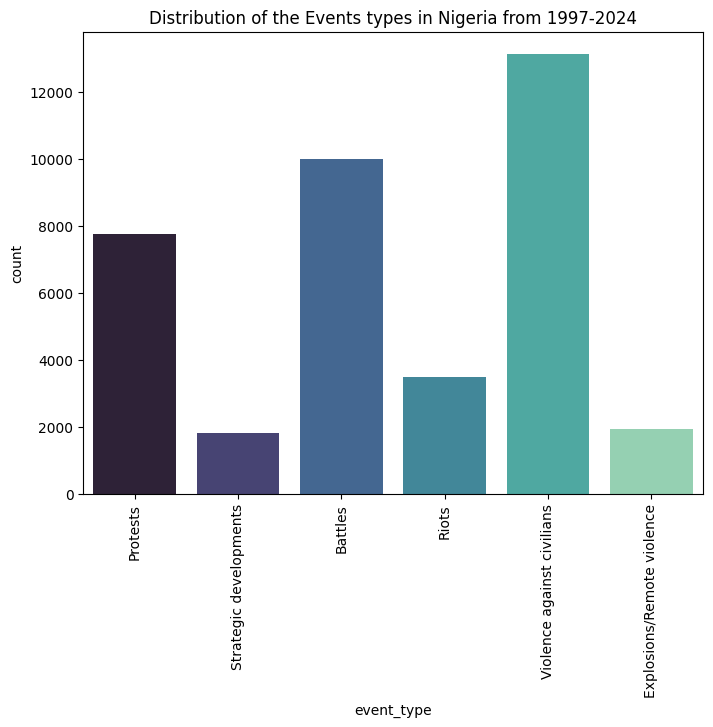

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data = data, x = "event_type", palette="mako")
plt.title("Distribution of the Events types in Nigeria from 1997-2024")
plt.xticks(rotation=90)
plt.show();

**Inference:** The above shows that the most popular form crime induced events over the past 17 years is violence against civilians.

#### **Bivariate/Multivariate Analysis**

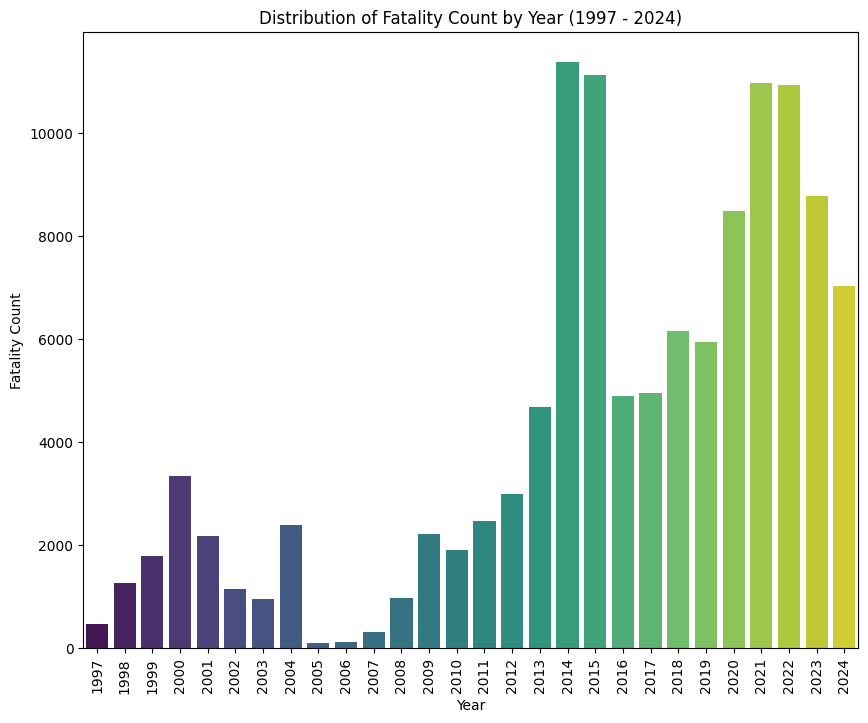

In [29]:
fatalities_year = (data.groupby("year")["fatalities"].sum()).sort_values().to_frame()
plt.figure(figsize=(10,8))
sns.barplot(x=fatalities_year.index, y=fatalities_year["fatalities"], palette="viridis")
plt.title("Distribution of Fatality Count by Year (1997 - 2024)")
plt.xlabel("Year")
plt.ylabel("Fatality Count")
plt.xticks(rotation=90)
plt.show();

**Inference:** In 2015, Nigeria faced had it's highest fatality count ever recorded it reduced drastically in the following years but spiked up again in 2020 (this might be attributed to the End SARS Protest) and in 2021, 2022 there was a drastic hike. In 2023, we can see the count dropping and this could be attributed to security policies put in place. 

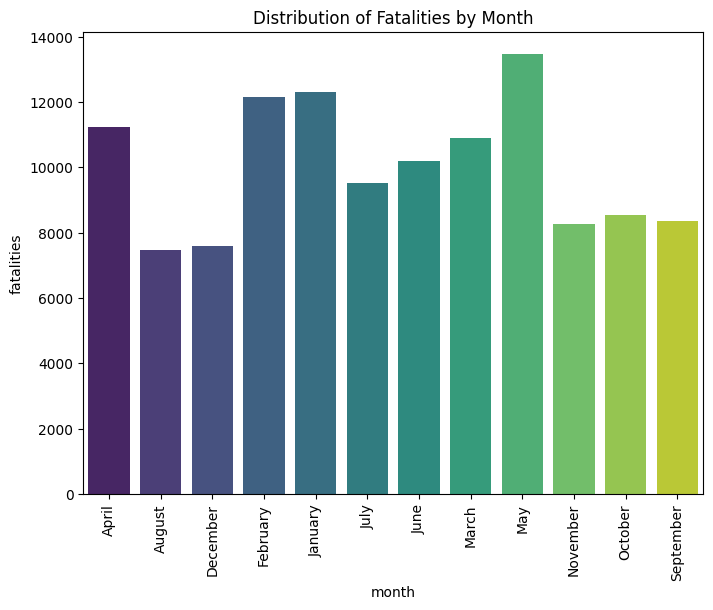

In [30]:
mon = (data.groupby("month")["fatalities"].sum()).to_frame()
plt.figure(figsize = (8,6))
sns.barplot(x=mon.index, y = mon["fatalities"], palette="viridis")
plt.title("Distribution of Fatalities by Month")
plt.xticks(rotation=90)
plt.show();

**Inference:** The highest fatality count over the years is recorded in the month of May with almost 14000 fatalities recorded. January, February and April have close counts and this could be for different reasons. Further investigation will be made in other plots.

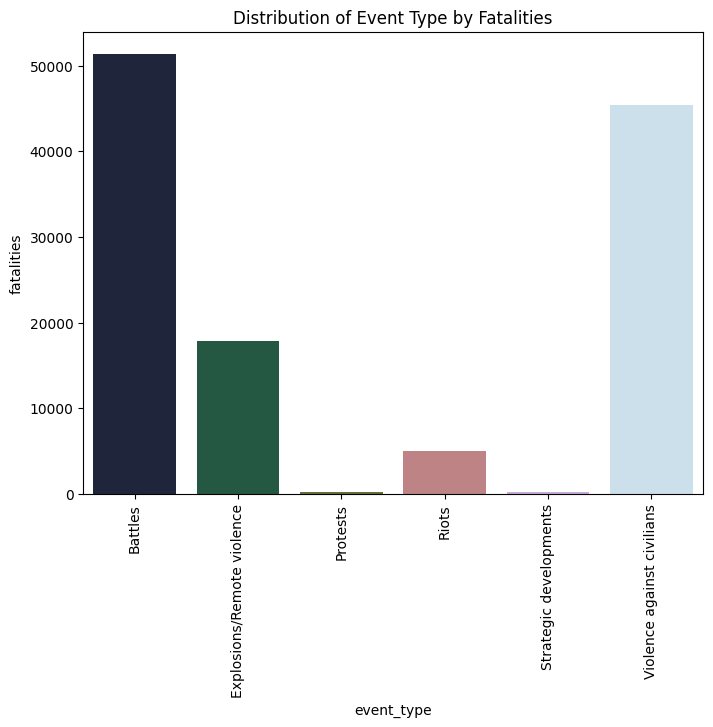

In [31]:
event = (data.groupby("event_type")["fatalities"].sum()).to_frame()
plt.figure(figsize = (8,6))
sns.barplot(x=event.index, y = event["fatalities"], palette="cubehelix")
plt.title("Distribution of Event Type by Fatalities")
plt.xticks(rotation=90)
plt.show();

**Inference:** Battles has caused over 50,000 fatalities with violence against civilians close behind it. 

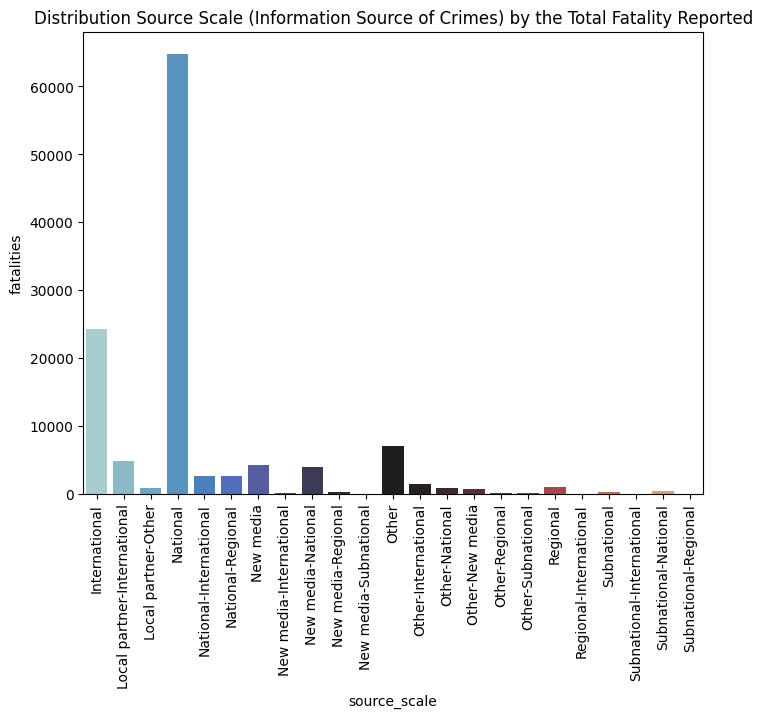

In [32]:
source = (data.groupby("source_scale")["fatalities"].sum()).to_frame()
plt.figure(figsize = (8,6))
sns.barplot(x=source.index, y = source["fatalities"], palette="icefire")
plt.title("Distribution Source Scale (Information Source of Crimes) by the Total Fatality Reported")
plt.xticks(rotation=90)
plt.show();

**Inference:** Reports of fatality in different locations came from National sources with newspapers such as Vanguard, Daily Trust and Daily Post with over 60,000 of fatality reports. 

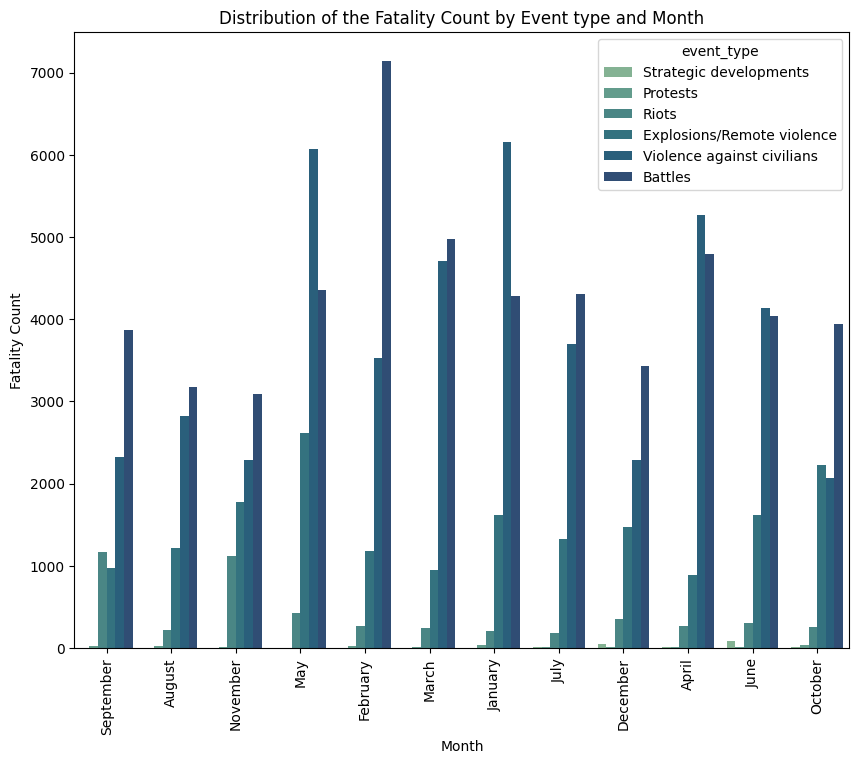

In [33]:
fatalities_event_mon = (data.groupby(["event_type", "month"])
                    ["fatalities"].sum()).sort_values(ascending=True).to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data= fatalities_event_mon, x="month", y="fatalities", palette="crest", hue= "event_type")
plt.title("Distribution of the Fatality Count by Event type and Month")
plt.xlabel("Month")
plt.ylabel("Fatality Count")
plt.xticks(rotation=90)
plt.show();

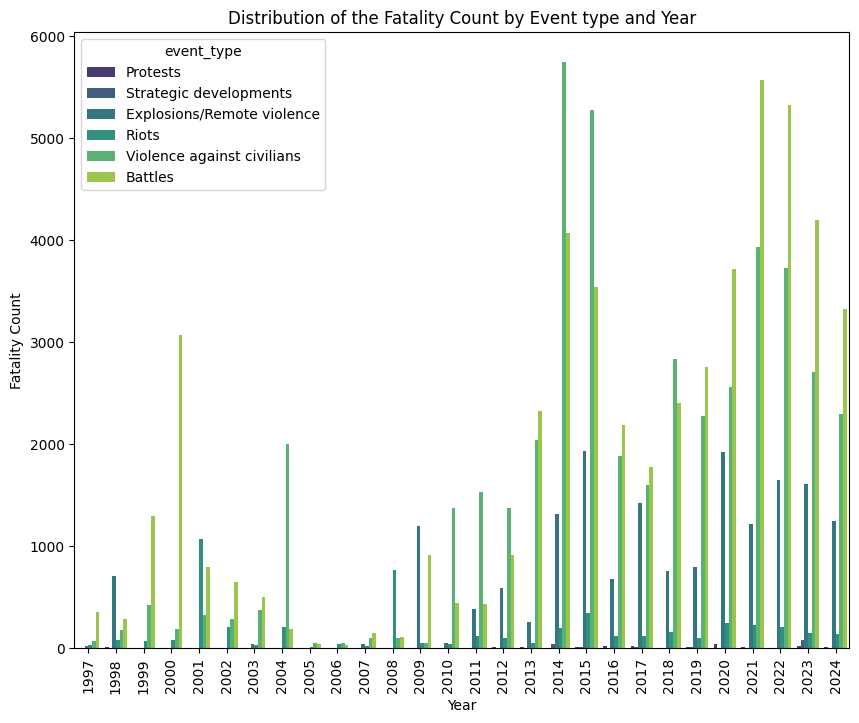

In [34]:
fatalities_event = (data.groupby(["event_type", "year"])
                    ["fatalities"].sum()).sort_values(ascending=True).to_frame().reset_index()
plt.figure(figsize=(10,8))
sns.barplot(data= fatalities_event, x="year", y="fatalities", palette="viridis", hue= "event_type")
plt.title("Distribution of the Fatality Count by Event type and Year")
plt.xlabel("Year")
plt.ylabel("Fatality Count")
plt.xticks(rotation=90)
plt.show();

**Inference:** In 2014 and 2015 the fatality from violence against civilians in Nigeria was on a rise and in 2021 we started seeing a rise in fatalities due to battles up till 2024

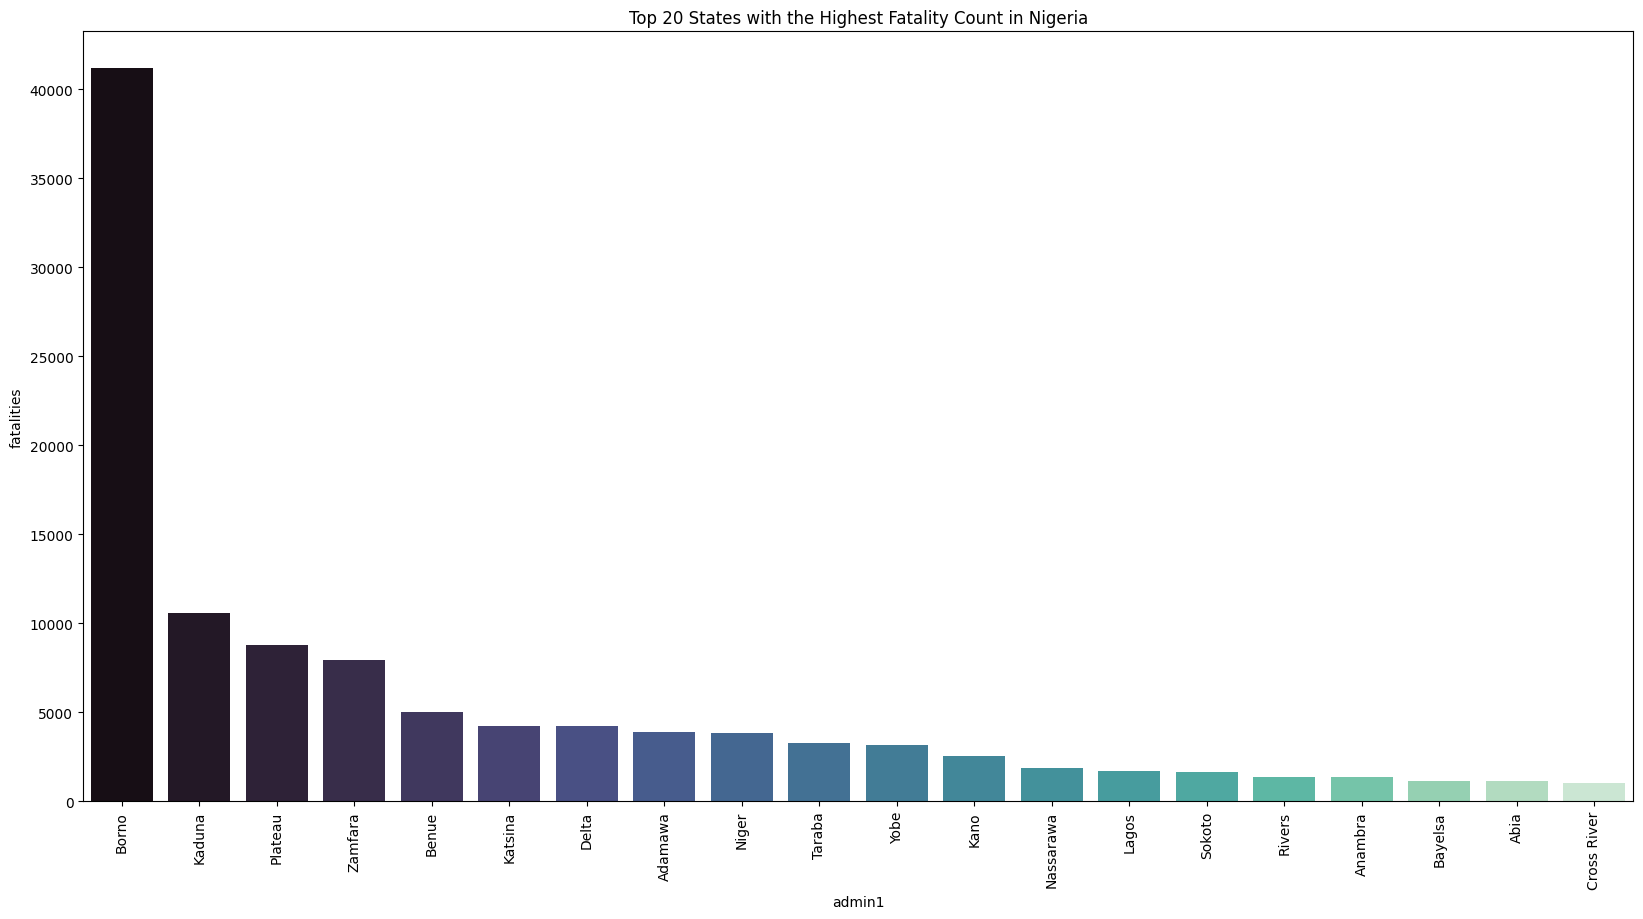

In [35]:
state = (data.groupby("admin1")["fatalities"].sum().sort_values(ascending=False)).to_frame().head(20)
plt.figure(figsize=(20,10))
sns.barplot(x=state.index, y=state["fatalities"], palette = "mako")
plt.title("Top 20 States with the Highest Fatality Count in Nigeria")
plt.xticks(rotation=90)
plt.show();

**Inference:** Borno state has the highest count of fatalities in Nigeria. Borno state is in the North-East geopolitical zone in Nigeria. There has been high counts of insecurity in that region resulting in deaths of civilians. 

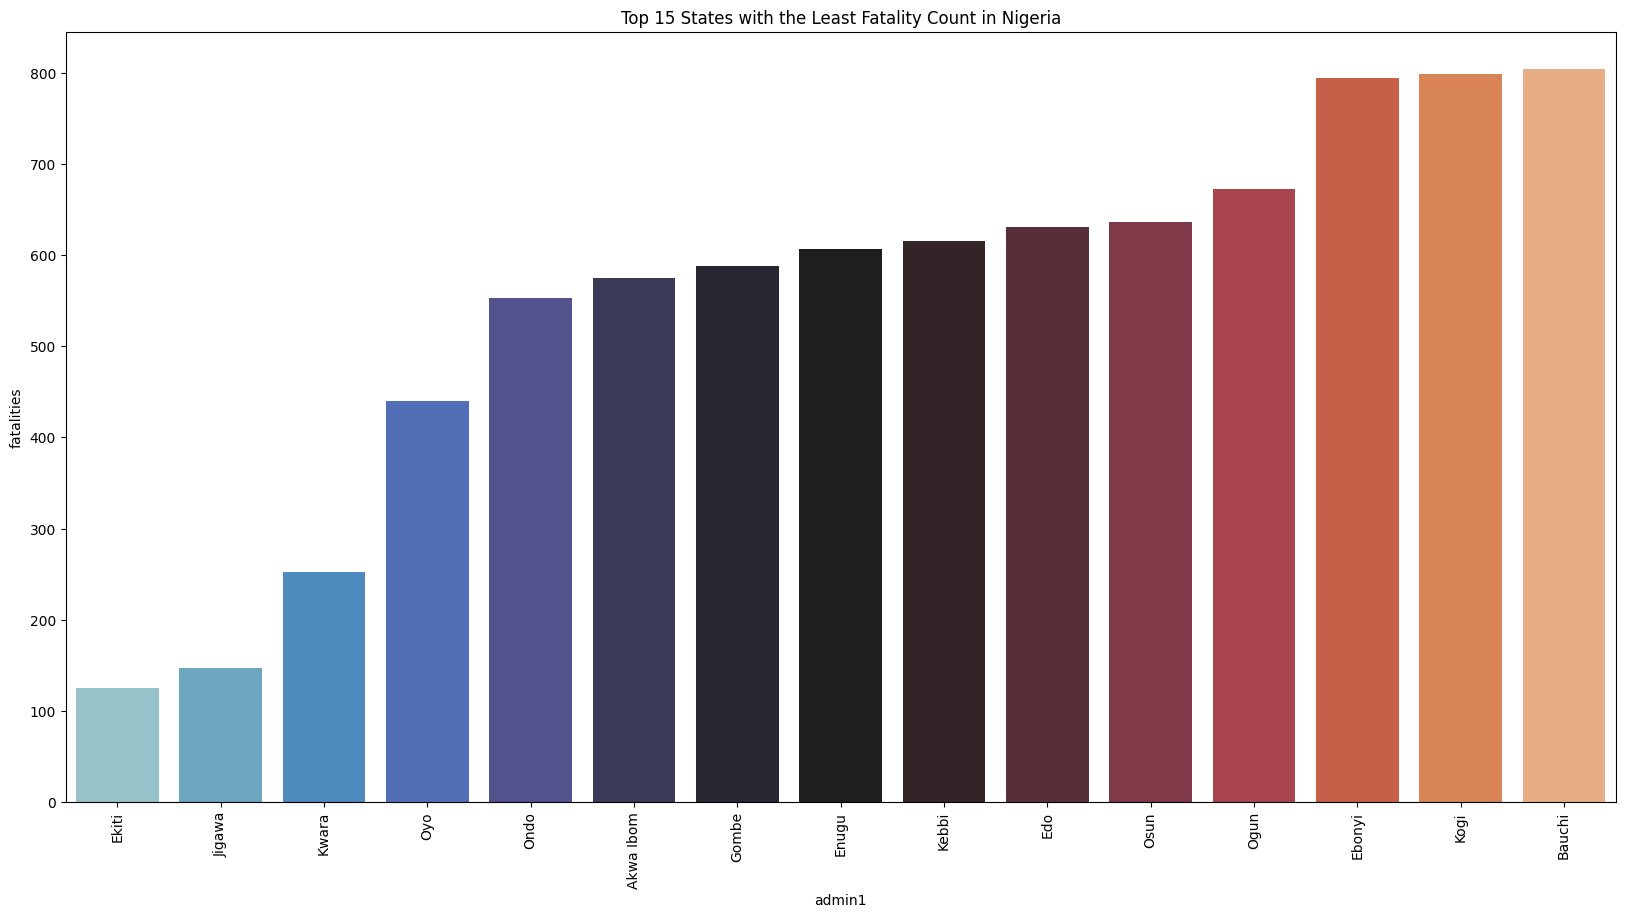

In [36]:
state = (data.groupby("admin1")["fatalities"].sum().sort_values(ascending=True)).to_frame().head(15)
plt.figure(figsize=(20,10))
sns.barplot(x=state.index, y=state["fatalities"], palette = "icefire")
plt.title("Top 15 States with the Least Fatality Count in Nigeria")
plt.xticks(rotation=90)
plt.show();

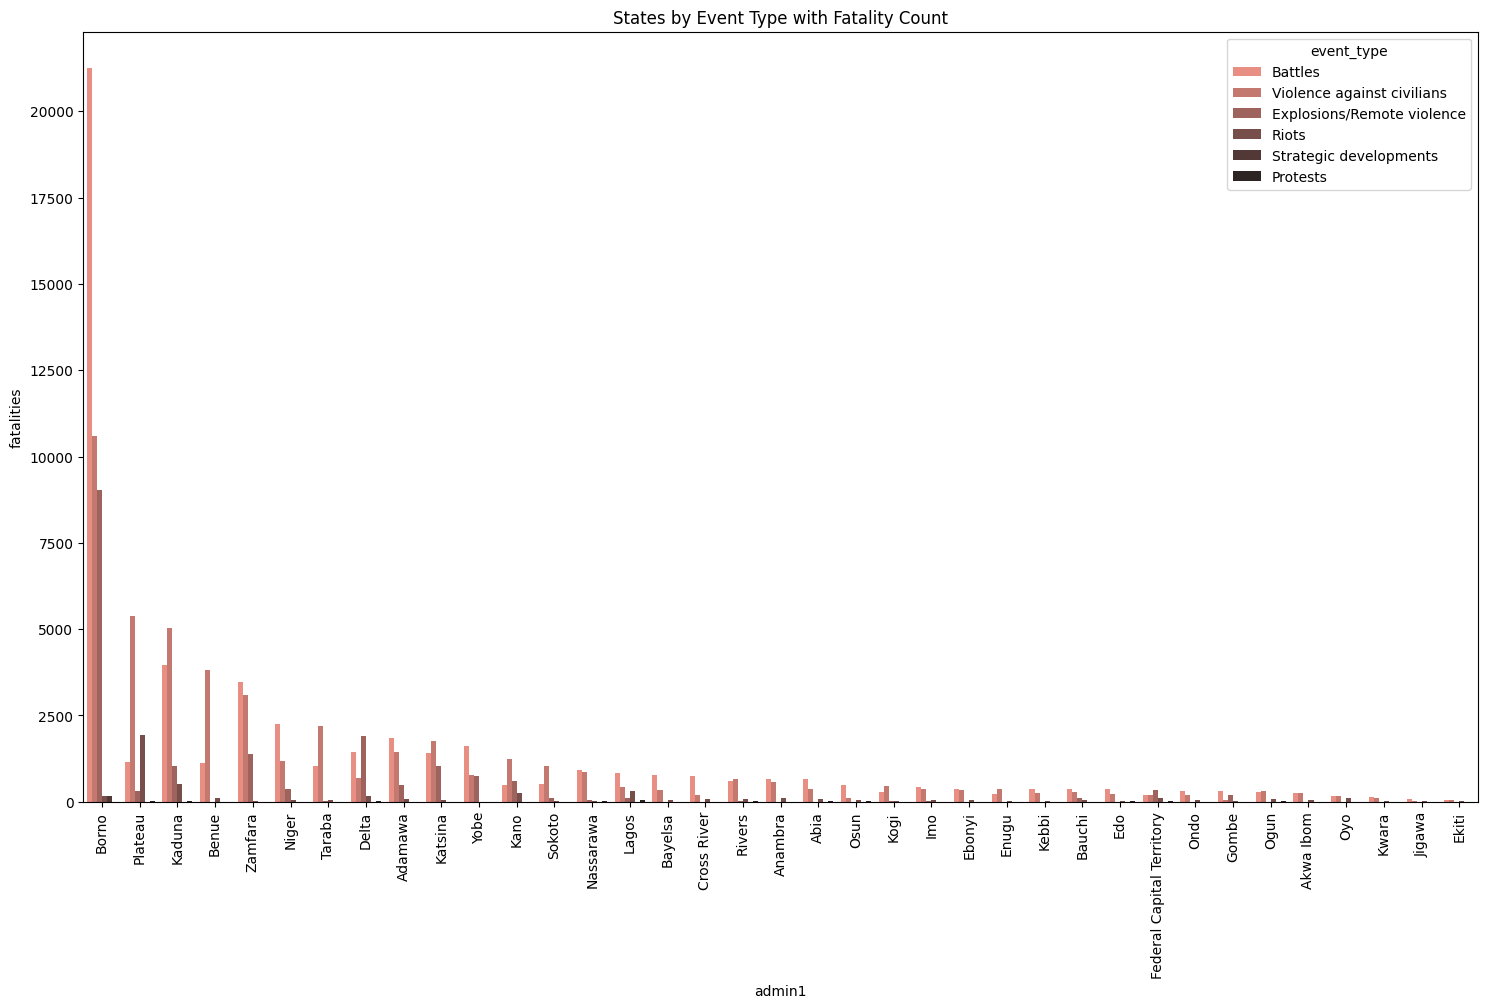

In [37]:
state = (data.groupby(["admin1", "event_type"])["fatalities"].sum().
         sort_values(ascending=False)).to_frame().reset_index()
plt.figure(figsize=(18,10))
sns.barplot(data=state, x="admin1", y="fatalities", hue = "event_type", palette = "dark:salmon_r")
plt.title("States by Event Type with Fatality Count")
plt.xticks(rotation=90)
plt.show();

**Inference:** The major cause of fatality in Borno with over 20,000 count is Battles followed by an intense violence against civilians with a bit over 10,000 count. Plateau had a fairly high count of fatatlity with violence against civilians taking the lead at 6000 plus reports. States such as Kaduna, Benue and Zamfara show a high count in general. These states are in the north east, north west and northe central of Nigeria making it an unsafe zone for civilians. 